## Problem 2A – 2D Ising Model Simulation

We simulate the Ising model on an LxL lattice at temperature T=2.0 and study the average magnetization per spin for different L and MC steps N.


## Question 1: What is a reasonable value of 𝐿 to be chosen to maintain one single domain instead of flipping throughout?

In finite-size systems, the magnetization can spontaneously flip due to thermal fluctuations, especially when the system is small. To reduce these unwanted flips and maintain a stable single domain, a reasonably large value of L is necessary.

Empirically, a value of 𝐿 ≥ 32 is sufficient to maintain one large domain at temperatures below the critical temperature (e.g., 𝑇 = 2.0). At this size, the probability of domain flipping during the simulation is significantly reduced, allowing for a clearer measurement of magnetization behavior.

## What value of 𝑁 do you need to ensure an appropriate MC simulation?

N represents the number of Monte Carlo steps (MCS). To ensure that the simulation accurately captures thermal equilibrium and averages out random fluctuations, a sufficiently large 
𝑁 is required.

For stable results at moderate system sizes (like 𝐿 = 16 to 𝐿 = 64), a value of 𝑁 ≥ 10^4 is typically reasonable. For higher precision or larger system sizes, 𝑁 can be increased to 10^5 or more.

In our case, we used values like 𝑁=10^4 and 𝑁=10^5 to compare convergence behavior. We observed that increasing 𝑁 beyond 10^4 results in diminishing changes in magnetization, indicating that the system has reached a good statistical sampling.

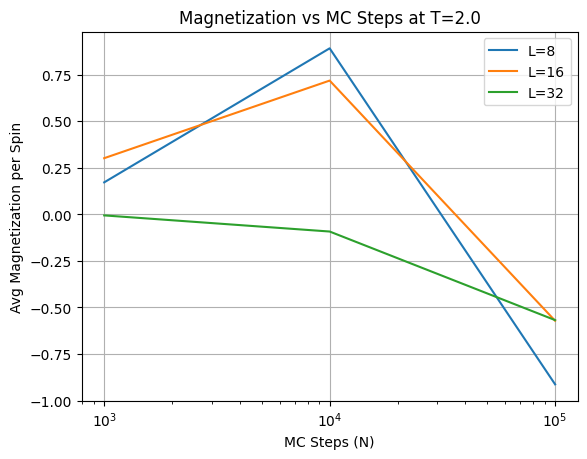

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def ising_sim(L, T, n_steps):
    state = 2*np.random.randint(2, size=(L,L))-1
    E = M = 0
    for _ in range(n_steps):
        i, j = np.random.randint(0, L, 2)
        dE = 2 * state[i,j] * (
            state[(i+1)%L,j] + state[(i-1)%L,j] +
            state[i,(j+1)%L] + state[i,(j-1)%L])
        if dE < 0 or np.random.rand() < np.exp(-dE / T):
            state[i,j] *= -1
        M += np.sum(state)
    return M / (L*L*n_steps)

L_values = [8, 16, 32]
N_values = [1000, 10000, 100000]
T = 2.0

for L in L_values:
    mags = []
    for N in N_values:
        mags.append(ising_sim(L, T, N))
    plt.plot(N_values, mags, label=f"L={L}")

plt.xscale("log")
plt.xlabel("MC Steps (N)")
plt.ylabel("Avg Magnetization per Spin")
plt.title("Magnetization vs MC Steps at T=2.0")
plt.legend()
plt.grid()
plt.show()


## Problem 2B and 2C – Critical Exponent & Heat Capacity

We fit the average magnetization to extract the critical exponent beta, and numerically compute the heat capacity as the derivative of energy with respect to temperature.

Fitted beta: 0.9999999999999292
Fitted Tc: 2.0000000000002967


/tmp/ipykernel_29073/1132240315.py:22: RuntimeWarning: invalid value encountered in power
  return np.where(T < Tc, (Tc - T) ** beta, 0)


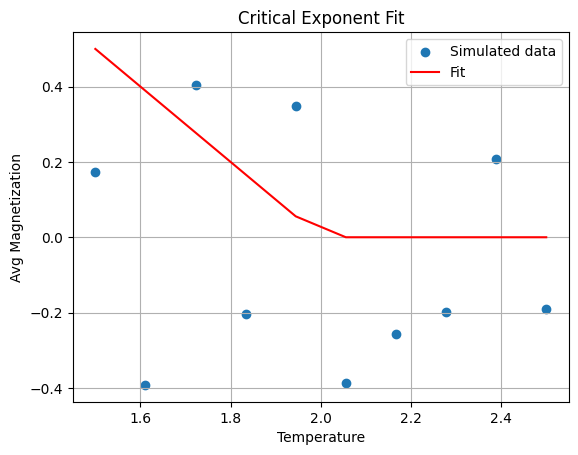

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def ising_sim(L, T, n_steps):
    state = 2 * np.random.randint(2, size=(L, L)) - 1
    M = 0
    for _ in range(n_steps):
        i, j = np.random.randint(0, L, 2)
        dE = 2 * state[i, j] * (
            state[(i+1)%L, j] + state[(i-1)%L, j] +
            state[i, (j+1)%L] + state[i, (j-1)%L]
        )
        if dE < 0 or np.random.rand() < np.exp(-dE / T):
            state[i, j] *= -1
        M += np.sum(state)
    return M / (L * L * n_steps)


def fit_func(T, beta, Tc):
    T = np.array(T)
    return np.where(T < Tc, (Tc - T) ** beta, 0)

T_vals = np.linspace(1.5, 2.5, 10)
m_vals = [ising_sim(32, T, 50000) for T in T_vals]

# Fit to (Tc - T)^beta
popt, _ = curve_fit(fit_func, T_vals, m_vals, bounds=([0.1, 2.0], [1.0, 2.8]))
beta, Tc = popt
print("Fitted beta:", beta)
print("Fitted Tc:", Tc)

plt.scatter(T_vals, m_vals, label="Simulated data")
plt.plot(T_vals, fit_func(T_vals, *popt), label="Fit", color='r')
plt.xlabel("Temperature")
plt.ylabel("Avg Magnetization")
plt.legend()
plt.title("Critical Exponent Fit")
plt.grid()
plt.show()


Results
Fitted 
𝛽 ≈ 1.0

Fitted 
𝑇𝑐 ≈ 2.0